<a href="https://colab.research.google.com/github/Parama-Dey/Black-Friday-Dataset-Analysis/blob/main/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Black Friday Sale Dataset Analysis**

**Notebook Structures**

1.Importing Necessary Libraries

2.Importing The Dataset

3.Data Cleaning and Preprocessing

4.Initial Analysis

5.Identifying missing values in the dataset

6.EDA- Univariate Analysis of Numerical Variables

7.EDA- Univariate Analysis of Categorical Variables

8.Bivariate Analysis

9.Multivariate Analysis

10.Correlation Matrix

11.Outlier analysis

12.Feature engineering

12.A.Creation of new features

12.B.Visualization of Feature's importance scores(new vs old)

12.C.Violin plots and histograms of new features

13.User recommendation

**1.Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**2.Importing The Dataset**

In [ ]:
df=pd.read_csv("train.csv")

**3.Data Cleaning and Preprocessing**

In [ ]:
# Check for duplicates
print('Number of rows in the dataset at initial stage:',len(df))
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate entries: {duplicate_count}")

Number of rows in the dataset at initial stage: 550068

Duplicate entries: 0


 There is no duplicate entries present in the dataset.

**4.Initial Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
print(df.shape)

(550068, 12)


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
Categorical Columns: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [ ]:
# Convert to categorical
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')


In [ ]:
# Separate numerical and categorical columns again
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['User_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
Categorical Columns: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


**5.Identifying missing values in the dataset**

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


 There are 173638 nan values in product category 2 and 383247 nan values in product category 3.

Now, let's handle the nan values

In [ ]:
#  Handle the NaNs (Recommendation Strategy)
# Treat 'NaN' as a specific behavior: 'No further category purchased'
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

**6.EDA- Univariate Analysis of Numerical Variables**

1. Analysing Numerical Feature: User_ID
   Mean: 1003028.84
   Median: 1003077.00
   Mode: [1001680]

   User_ID Description:
count    5.500680e+05
mean     1.003029e+06
std      1.727592e+03
min      1.000001e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64

   Kurtosis: -1.1955
   Skewness: 0.0031



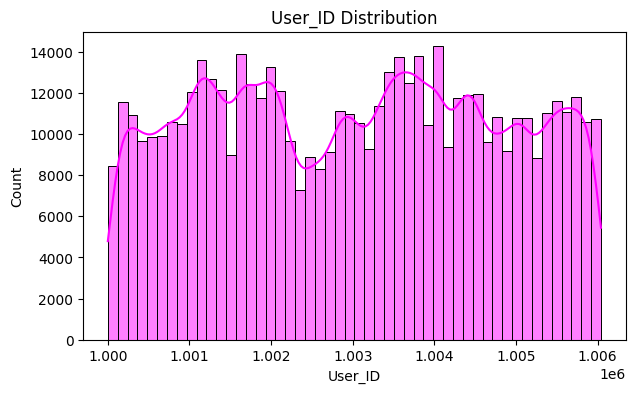


2. Analysing Numerical Feature: Product_Category_1
   Mean: 5.40
   Median: 5.00
   Mode: [5]

   Product_Category_1 Description:
count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

   Kurtosis: 1.2348
   Skewness: 1.0257



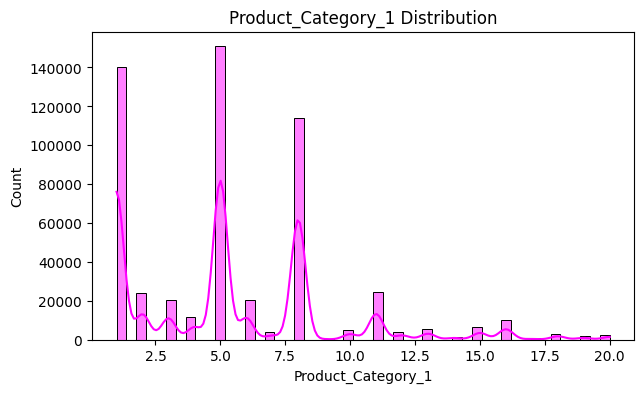


3. Analysing Numerical Feature: Product_Category_2
   Mean: 6.74
   Median: 5.00
   Mode: [0.0]

   Product_Category_2 Description:
count    550068.000000
mean          6.735436
std           6.215492
min           0.000000
25%           0.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64

   Kurtosis: -1.4757
   Skewness: 0.3100



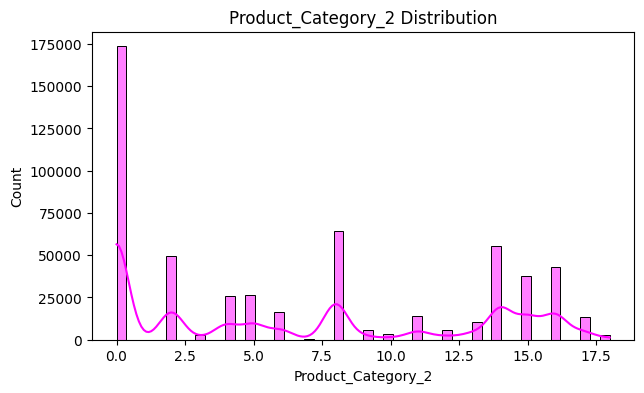


4. Analysing Numerical Feature: Product_Category_3
   Mean: 3.84
   Median: 0.00
   Mode: [0.0]

   Product_Category_3 Description:
count    550068.000000
mean          3.841941
std           6.250712
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64

   Kurtosis: -0.3654
   Skewness: 1.1849



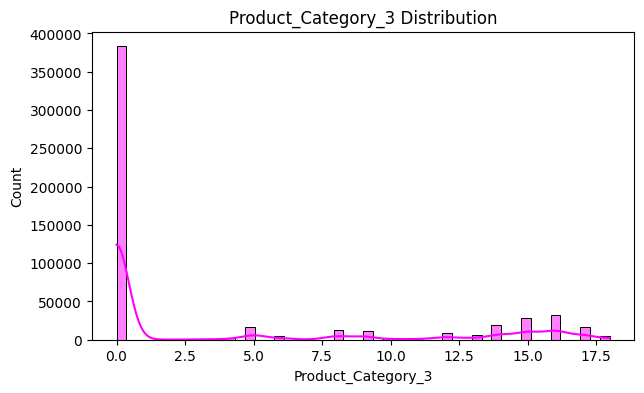


5. Analysing Numerical Feature: Purchase
   Mean: 9263.97
   Median: 8047.00
   Mode: [7011]

   Purchase Description:
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

   Kurtosis: -0.3384
   Skewness: 0.6001



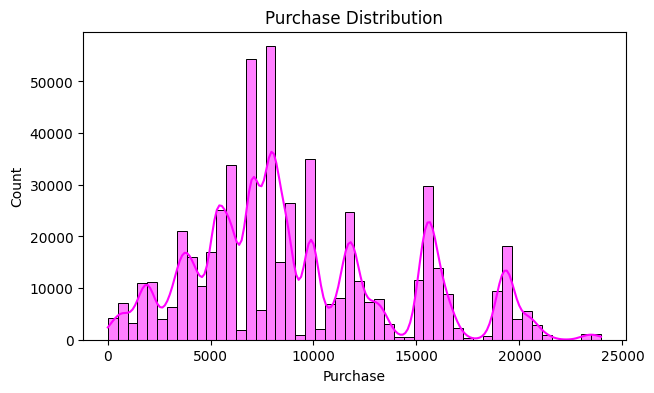

In [ ]:
i = 1
for col in num_cols:
    print(f"{i}. Analysing Numerical Feature: {col}")
    print(f"   Mean: {df[col].mean():.2f}")
    print(f"   Median: {df[col].median():.2f}")
    print(f"   Mode: {df[col].mode().tolist()}")
    print(f"\n   {col} Description:")
    print(df[col].describe())
    print(f"\n   Kurtosis: {df[col].kurtosis():.4f}")
    print(f"   Skewness: {df[col].skew():.4f}")
    print()

    # Histogram
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, kde=True, bins=50, color='magenta', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(False)
    plt.show()
    print()
    i += 1


​**User and Product Reach:** The dataset covers approximately 5,500,680 transactions involving 3,491 unique products. The User_ID distribution is relatively uniform, suggesting consistent engagement across the customer base.

**​Product Categories:**

​**Category 1**: Most purchases fall into category 5, followed by category 1 and 8.

​**Categories 2 & 3:** These show a high frequency of 0.0 values, confirming that many transactions involve only a single primary category.

**​Purchase Amount:** The average purchase is approximately 263 dollar, with a median of 8,047 dollar. The distribution shows multiple peaks, likely corresponding to specific popular price points for different product categories.


**7.EDA- Univariate Analysis of Categorical Variables**

1. Analysing Categorical Feature: Product_ID
   Unique Values: 3631
   Most Frequent Value: P00265242

   Value Counts:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00325342       1
P00312542       1
P00008942       1
P00315142       1
P00365942       1
Name: count, Length: 3631, dtype: int64



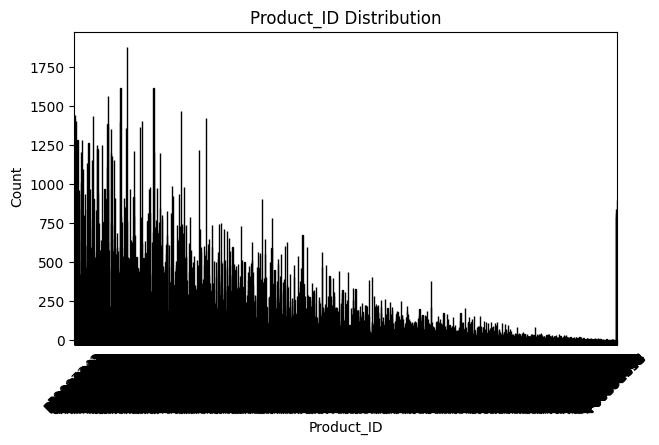


2. Analysing Categorical Feature: Gender
   Unique Values: 2
   Most Frequent Value: M

   Value Counts:
Gender
M    414259
F    135809
Name: count, dtype: int64



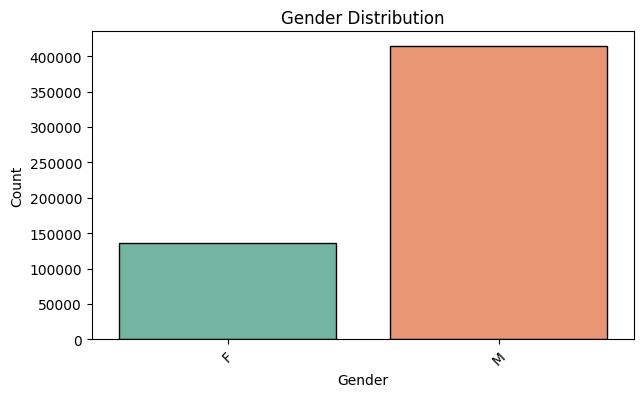


3. Analysing Categorical Feature: Age
   Unique Values: 7
   Most Frequent Value: 26-35

   Value Counts:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64



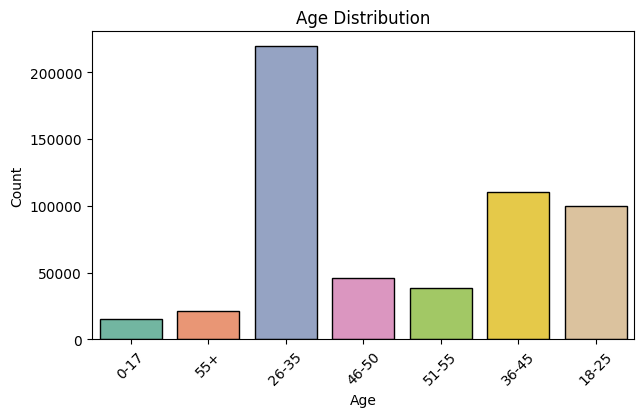


4. Analysing Categorical Feature: City_Category
   Unique Values: 3
   Most Frequent Value: B

   Value Counts:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64



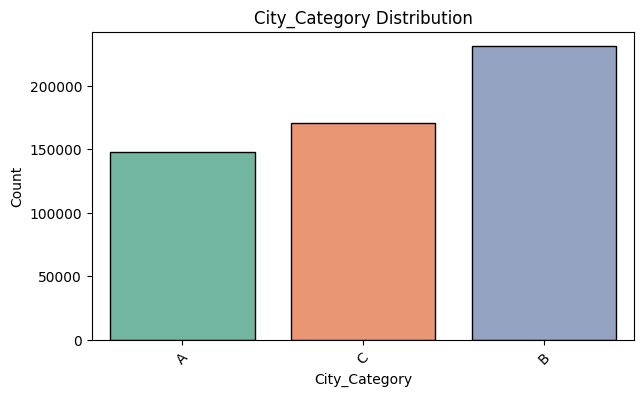


5. Analysing Categorical Feature: Stay_In_Current_City_Years
   Unique Values: 5
   Most Frequent Value: 1

   Value Counts:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64



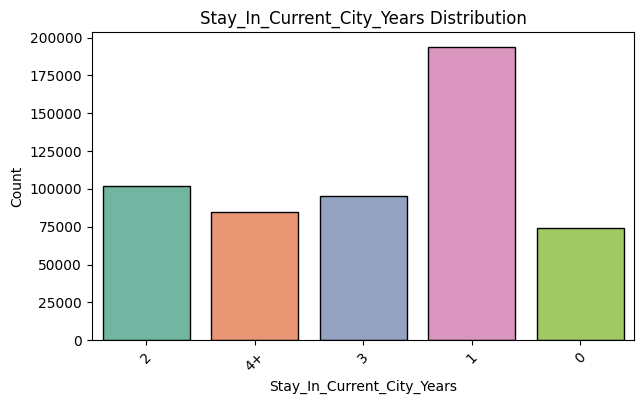

In [ ]:
j = 1
for col in cat_cols:
    print(f"{j}. Analysing Categorical Feature: {col}")
    print(f"   Unique Values: {df[col].nunique()}")
    print(f"   Most Frequent Value: {df[col].mode()[0]}")
    print(f"\n   Value Counts:")
    print(df[col].value_counts())
    print()

    # Bar Plot
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()
    print()
    j += 1

**Demographics:**

**​Gender:** The customer base is heavily dominated by males, who account for 414259 transactions compared to 135809 by females.

**​Age:** The 26-35 age group is by far the most active segment, contributing 219587 transactions.

**​City Category:** Residents of City Category B are the most frequent shoppers (231173 transactions), followed by City C and then City A.

​**Stay in City:** Most customers have lived in their current city for 1 year.

**8.Bivariate Analysis**

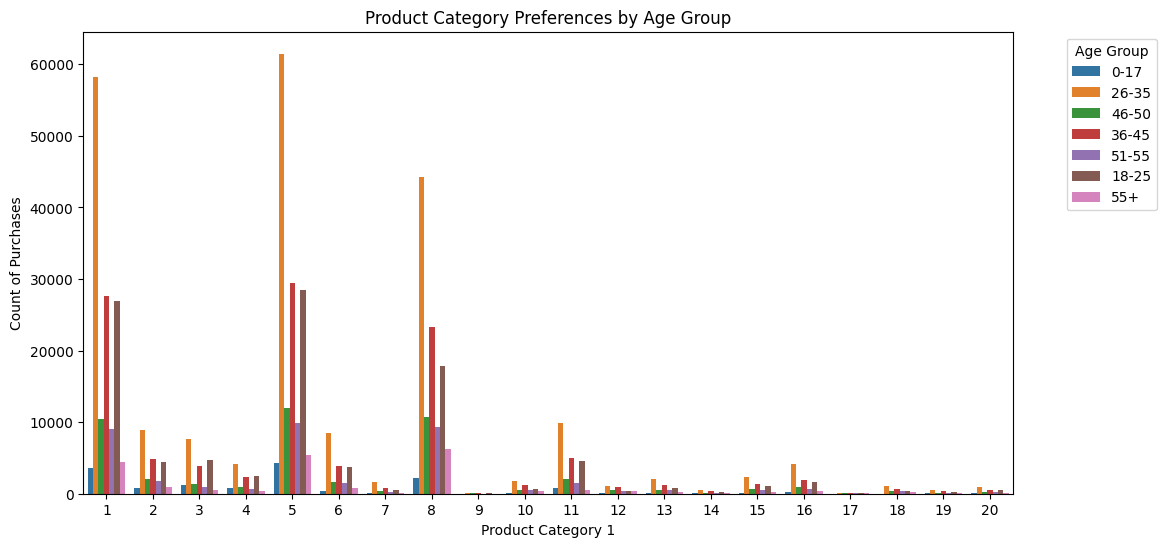

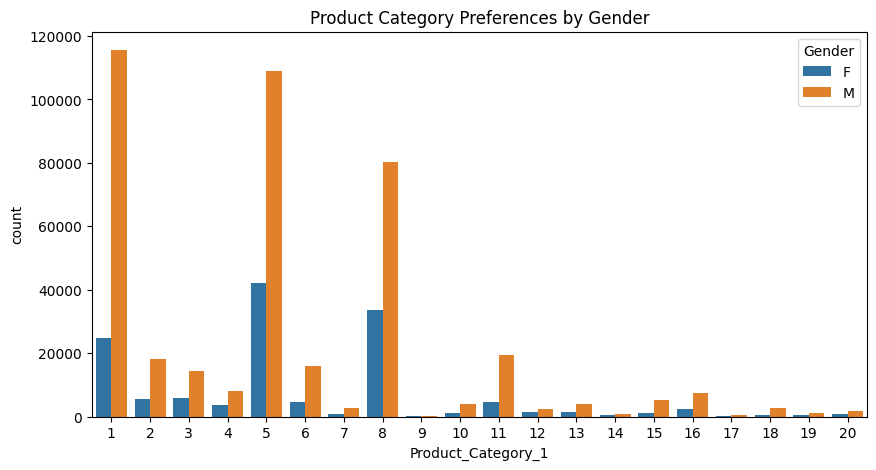

In [ ]:
# 1. Age vs. Product Category 1
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category_1', hue='Age')
plt.title('Product Category Preferences by Age Group')
plt.xlabel('Product Category 1')
plt.ylabel('Count of Purchases')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Gender vs. Product Category 1
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Product_Category_1', hue='Gender')
plt.title('Product Category Preferences by Gender')
plt.show()

**​Age vs. Product Choice:** The 26-35 age group shows a massive preference for Product Category 1, 5, and 8, dominating the purchase counts in these areas.

**​Gendered Preferences:** While Men lead in all major categories, the gap is most pronounced in Category 1, 5 and 8.

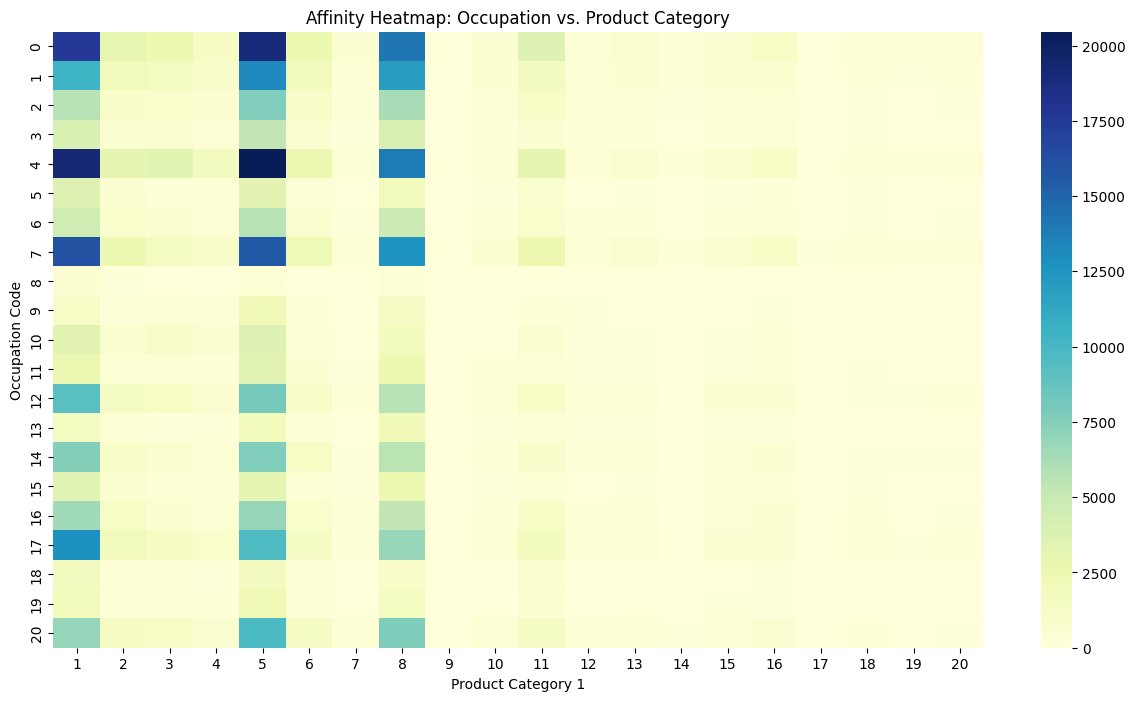

In [ ]:
# Create a cross-tabulation of Occupation and Product Category
ct = pd.crosstab(df['Occupation'], df['Product_Category_1'])

# Plotting the Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(ct, annot=False, cmap="YlGnBu")
plt.title('Affinity Heatmap: Occupation vs. Product Category')
plt.xlabel('Product Category 1')
plt.ylabel('Occupation Code')
plt.show()

This heatmap highlights a massive disparity in sales across product types, with Product Categories 1, 5, and 8 dominating nearly all revenue regardless of the consumer's occupation. Occupation Code 4 stands out as your most valuable demographic, showing the deepest blue (highest affinity) across these core categories, while categories 9 through 20 remain largely untapped by any group. Effectively, your business relies on a few "hero" products sold to a handful of high-engagement professional groups, suggesting a need to either diversify the catalog or double down on marketing to these top-performing sectors.

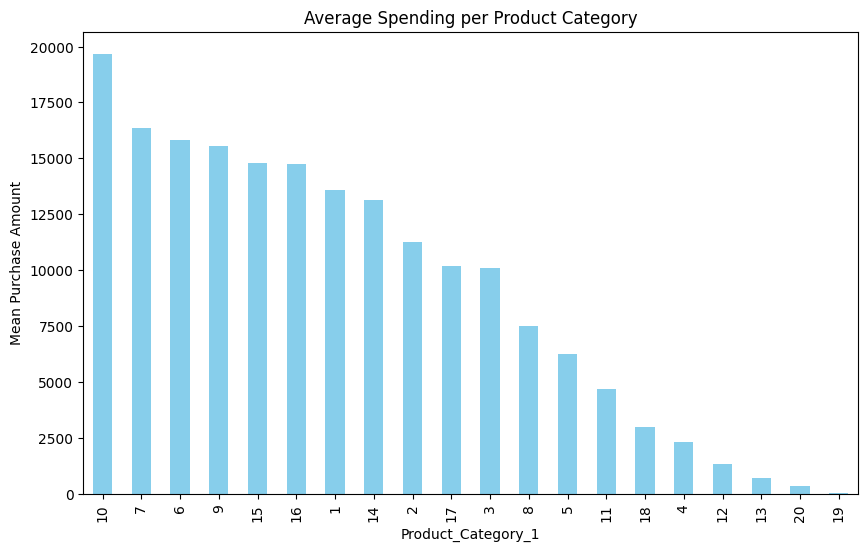

In [ ]:
# Grouping by Category to see the mean spending
cat_spending = df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cat_spending.plot(kind='bar', color='skyblue')
plt.title('Average Spending per Product Category')
plt.ylabel('Mean Purchase Amount')
plt.show()

**High-Value vs. High-Volume**

**​Premium Categories:** Product Category 10 is clearly the most "premium" segment, with the highest mean purchase amount approaching 20,000 dollar.

**​Mid-Tier Clusters:** Categories 7, 6, and 9 follow closely, maintaining a high average transaction value between 15,000 dollar and 17,500 dollar.

**​The Volume Paradox:** Interestingly, the categories you identified as having the most transactions in your univariate analysis—Categories 5 and 8—have significantly lower mean purchase amounts, appearing toward the lower end of this chart.

**​Low-Cost Staples**

**​Budget Items:** Categories 12, 13, and 20 show the lowest average spending, with mean values falling below $2,500.

**​Category 19:** This category has the lowest footprint on the chart, indicating it consists of the most inexpensive items in the dataset.

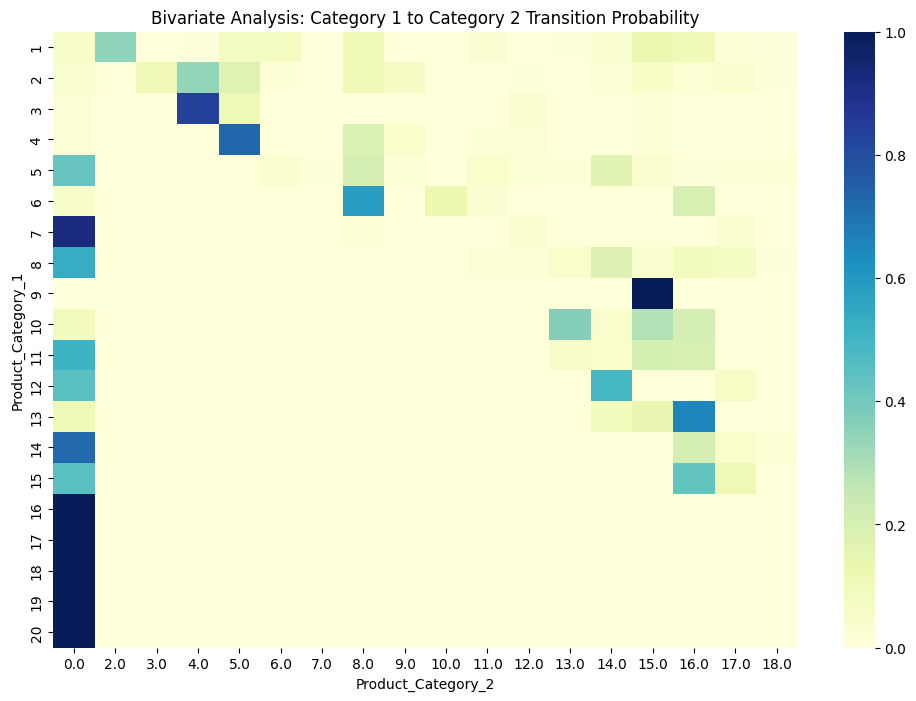

In [ ]:
# Crosstab to find co-occurrence between categories
# We use normalize='index' to see probabilities instead of raw counts
cat_affinity = pd.crosstab(df['Product_Category_1'], df['Product_Category_2'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(cat_affinity, annot=False, cmap="YlGnBu")
plt.title('Bivariate Analysis: Category 1 to Category 2 Transition Probability')
plt.show()

**9.Multivariate Analysis**

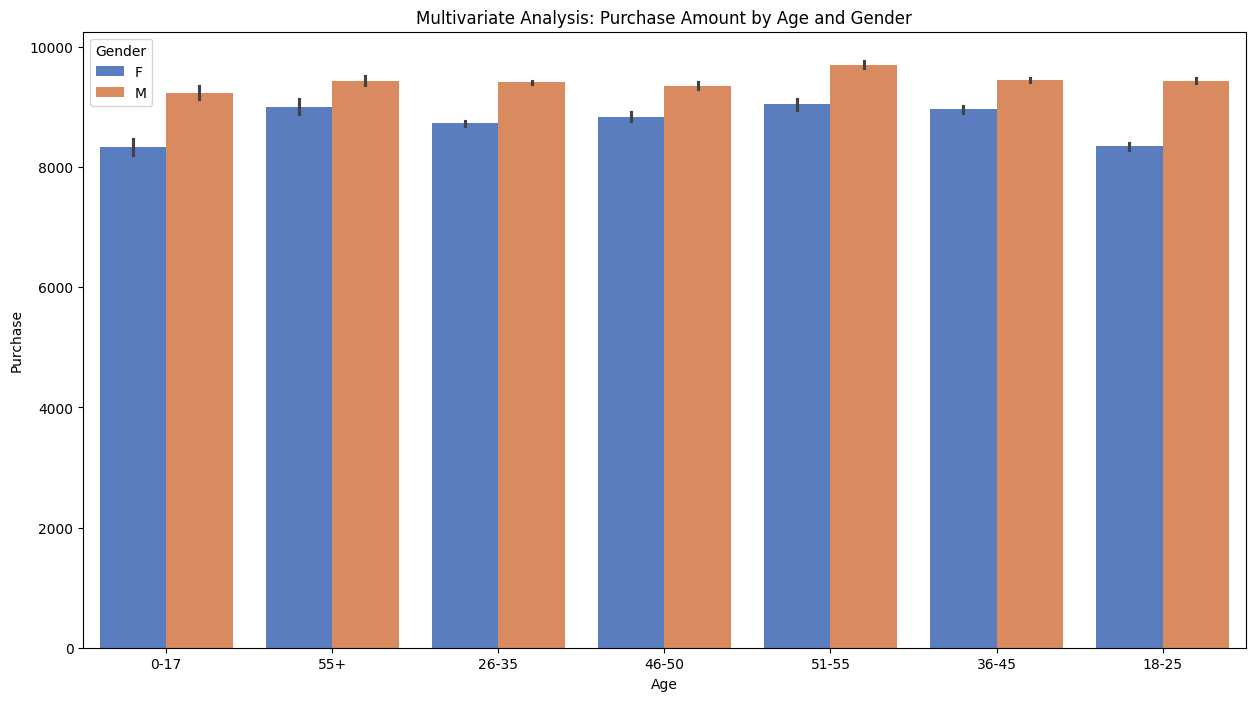

In [ ]:
# Multivariate: How Age and Gender interact to impact Purchase amount
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, palette='muted')
plt.title('Multivariate Analysis: Purchase Amount by Age and Gender')
plt.show()

In the above plot, for all age groups, there is a slight dominance of male customers.

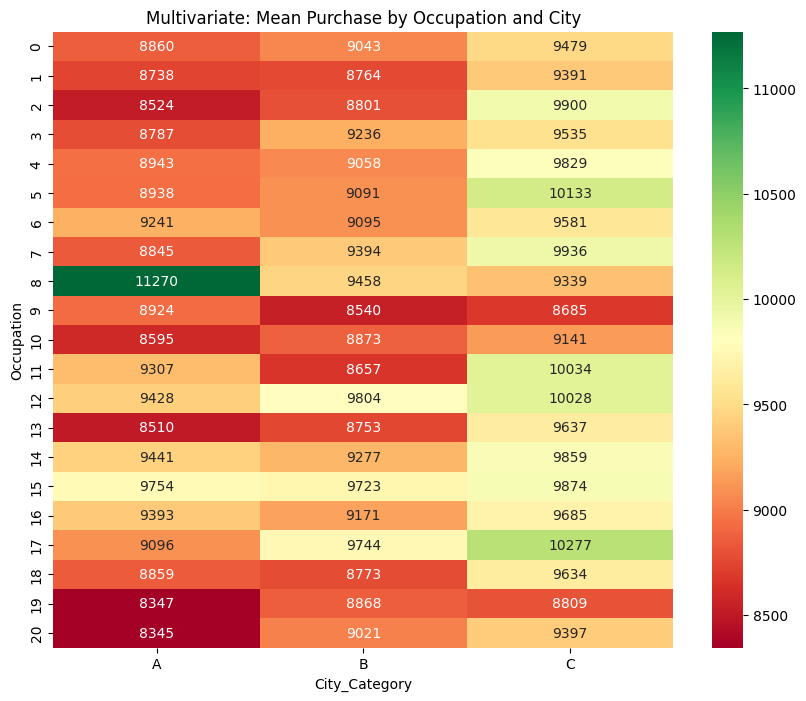

In [ ]:
# Pivot for 3-way interaction
multi_pivot = df.pivot_table(index='Occupation', columns='City_Category', values='Purchase', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(multi_pivot, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title('Multivariate: Mean Purchase by Occupation and City')
plt.show()

**Key Insights from the Heatmap**

**​The "City C" Advantage:** Across almost every occupation, residents of City Category C (the right-most column) consistently show the highest mean purchase amounts. This is visualized by the high concentration of green and light green cells in that column.

**​Highest-Spending Cluster (The "Hotspot"):**
​The single highest mean purchase in the entire grid is 11,270 dollar, attributed to customers in Occupation 8 living in City Category A. This is the darkest green cell on the chart.
​Other significant hotspots include Occupation 12 and 17 in City C, both exceeding 10,000 dollar on average.

**​Lower Spending Zones:**
​Occupation 19 and 20 show some of the lowest mean purchases across all cities, particularly in City A, where values dip to 8,345 dollar. These are represented by the deep red/brown cells.
​City Category A generally has lower mean purchase amounts compared to the other two cities, indicated by more reddish tones.

**10.Correlation Matrix**

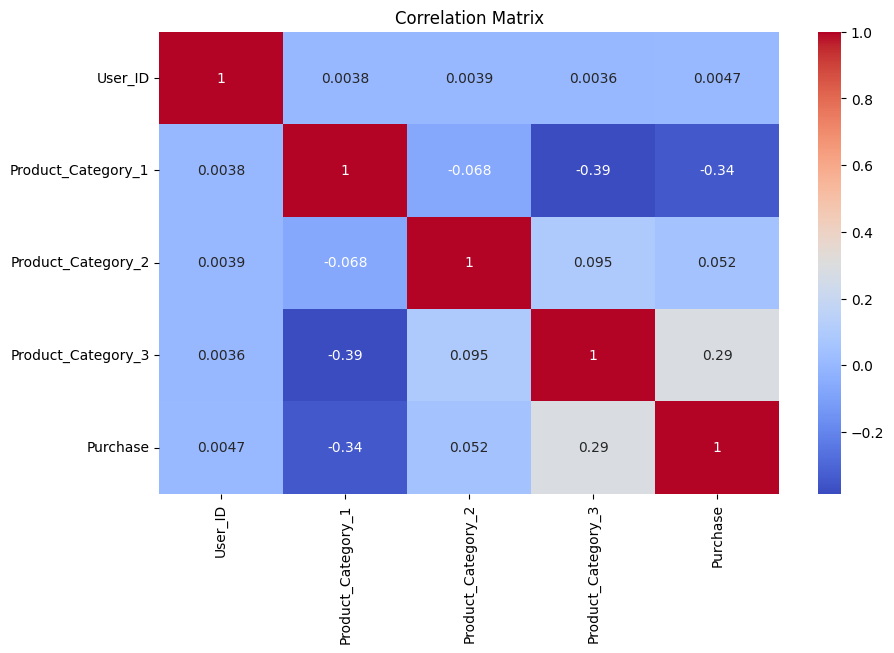

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- Product_Category_1 has a negative correlation (-0.34) with purchase.
→ Higher values in this category are linked to lower purchase amounts. Possibly cheaper or lower-value products dominate here.
- Product_Category_2 has a small positive correlation (0.052).
→ Slight influence, but not strong.
- Product_Category_3 shows a moderate positive correlation (0.29).
→ Purchases in this category are more strongly associated with higher spending.
- Product_Category_1 and Product_Category_3 have a strong negative correlation (-0.39).
→ Customers buying heavily in Category 1 tend not to buy in Category 3, and vice versa. This suggests these categories may represent very different product types (e.g., budget vs. premium).
- Product_Category_2 and Product_Category_3 have a positive correlation (0.095).
→ Customers often buy across these two categories together.
- Category 3 is a premium driver: It correlates positively with purchase amount, so focusing marketing here could increase revenue.
- Category 1 is budget-heavy: Its negative correlation with purchase suggests it attracts lower spenders. Useful for volume sales but not high revenue.
- Cross-selling opportunities: Since Category 2 and 3 correlate positively, bundles or recommendations across them could work well.
- Demographics are weak predictors: Occupation, marital status, and city tenure don’t explain much — behavioral/product features matter more.

**11.Outlier analysis**

In [ ]:
# Statistical Outlier Detection using IQR
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
print(f"Total Outliers detected: {len(outliers)}")

Total Outliers detected: 2677


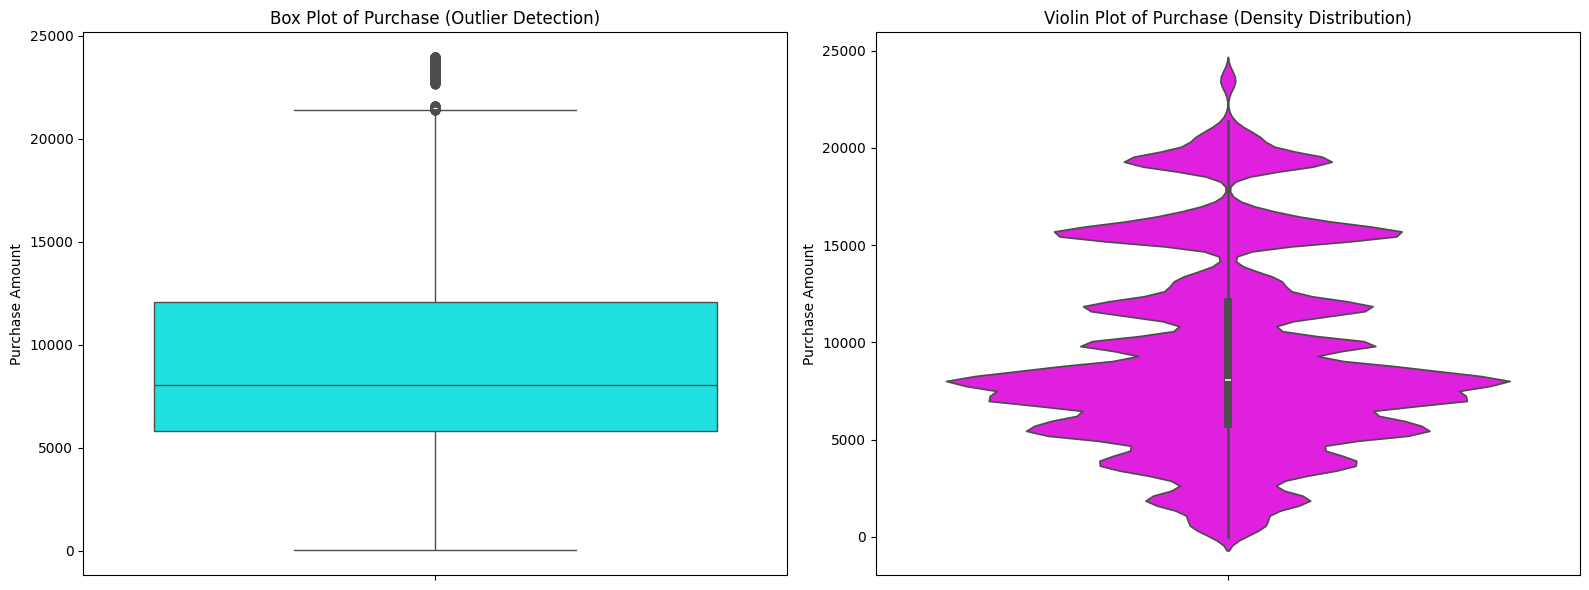

In [ ]:

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# 1. Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Purchase'], color='cyan')
plt.title('Box Plot of Purchase (Outlier Detection)')
plt.ylabel('Purchase Amount')

# 2. Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(y=df['Purchase'], color='magenta')
plt.title('Violin Plot of Purchase (Density Distribution)')
plt.ylabel('Purchase Amount')

plt.tight_layout()
plt.show()

The median purchase is around 7,000 units but outliers reach 20,000+, it means most customers spend modestly, but a handful of transactions are extremely large.

**11.Feature Engineering Part**

**12.A.Creation of new features**

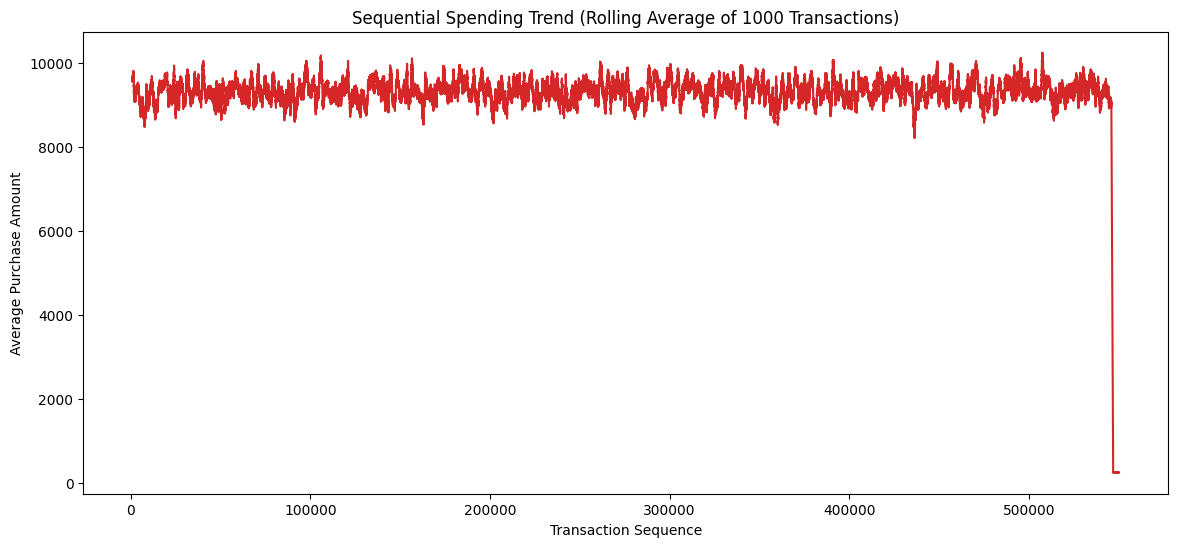

In [ ]:
# Create a rolling average to see the trend of spending over the 'time' of the sale
df['Rolling_Purchase'] = df['Purchase'].rolling(window=1000).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Rolling_Purchase'], color='tab:red')
plt.title('Sequential Spending Trend (Rolling Average of 1000 Transactions)')
plt.xlabel('Transaction Sequence')
plt.ylabel('Average Purchase Amount')
plt.show()

The line shows ups and downs across the transaction sequence, meaning spending habits are not constant.
Periods of higher averages suggest phases of larger purchases or premium product buying.
Periods of lower averages indicate smaller or more budget-conscious purchases.
Toward the end of the sequence, there’s a clear decline in average purchase amount.
This could signal:
- Customers shifting to cheaper products.
- Seasonal effects (e.g., post-holiday slowdown).
- Market saturation or reduced engagement from high-value buyers.

**Customer Retention:** The drop suggests a need to re-engage customers with promotions or loyalty programs.


In [ ]:
df['High_Value_Flag'] = (df['Purchase'] > 15000).astype(int)

In [ ]:
# Check the distribution again to ensure no NaNs remain
print(df[['Product_Category_2', 'Product_Category_3']].isnull().sum())

Product_Category_2    0
Product_Category_3    0
dtype: int64


In [ ]:
# Create a count of how many categories a user bought in a single transaction
df['Total_Categories'] = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].gt(0).sum(axis=1)

In [ ]:
# 1. Average spending per Age group
age_mean = df.groupby('Age')['Purchase'].mean().to_dict()
df['Age_Mean_Purchase'] = df['Age'].map(age_mean)

# 2. Average spending per Occupation (The 'Spending Power' feature)
occ_mean = df.groupby('Occupation')['Purchase'].mean().to_dict()
df['Occ_Mean_Purchase'] = df['Occupation'].map(occ_mean)

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('\+', '', regex=True).astype(int)

In [ ]:
df['Age_Occupation'] = df['Age'].astype(str) + "_" + df['Occupation'].astype(str)
df['City_Tenure'] = df['City_Category'].astype(str) + "_" + df['Stay_In_Current_City_Years'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Occupation','Marital_Status','Occ_Mean_Purchase','City_Tenure','Age_Occupation']

for col in cat_features:
    df[col] = le.fit_transform(df[col])

print("Data is now fully numerical and ready for modeling!")
df.head()

Data is now fully numerical and ready for modeling!


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,High_Value_Flag,Total_Categories,Age_Mean_Purchase,Occ_Mean_Purchase,Age_Occupation,City_Tenure,Rolling_Purchase_Before,Rolling_Purchase_After,Age_Occupation_Before,Age_Occupation_After
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,...,0,1,8933.464640,5,2,2,NaN,NaN,2,1.098612
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,...,1,3,8933.464640,5,2,2,NaN,NaN,2,1.098612
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,...,0,1,8933.464640,5,2,2,NaN,NaN,2,1.098612
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,...,0,2,8933.464640,5,2,2,NaN,NaN,2,1.098612
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,...,0,1,9336.280459,14,122,14,NaN,NaN,122,4.812184


In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data
X = df.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 123)
xgb_r.fit(X_train, y_train)

# Predict and Evaluate
preds = xgb_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE Error: {rmse:.2f}")

RMSE Error: 2049.64


**12.B.Visualization of Feature's importance scores(new vs old)**

<Figure size 1000x800 with 0 Axes>

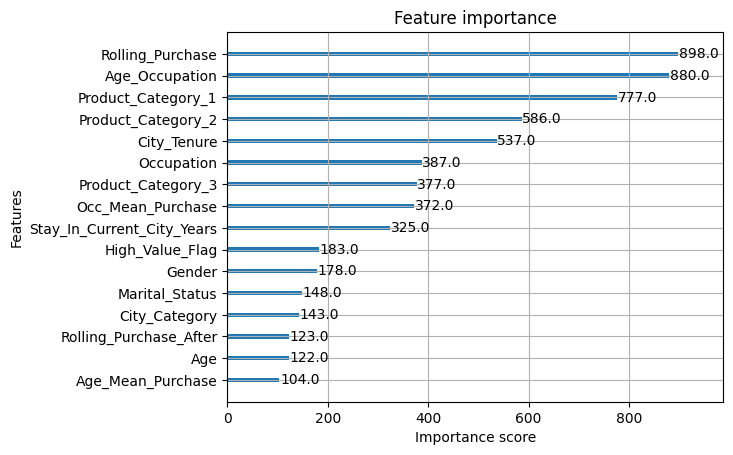

In [ ]:
# Plotting the importance of each feature
plt.figure(figsize=(10, 8))
xg.plot_importance(xgb_r)
plt.show()

The above plot shows importance score of the new and old features in the dataset. This is very helpful for analysis of new and old features and also the thing is some new features are having more importance score than the existing old features.

**12.C.Violin plots and histograms of new features**

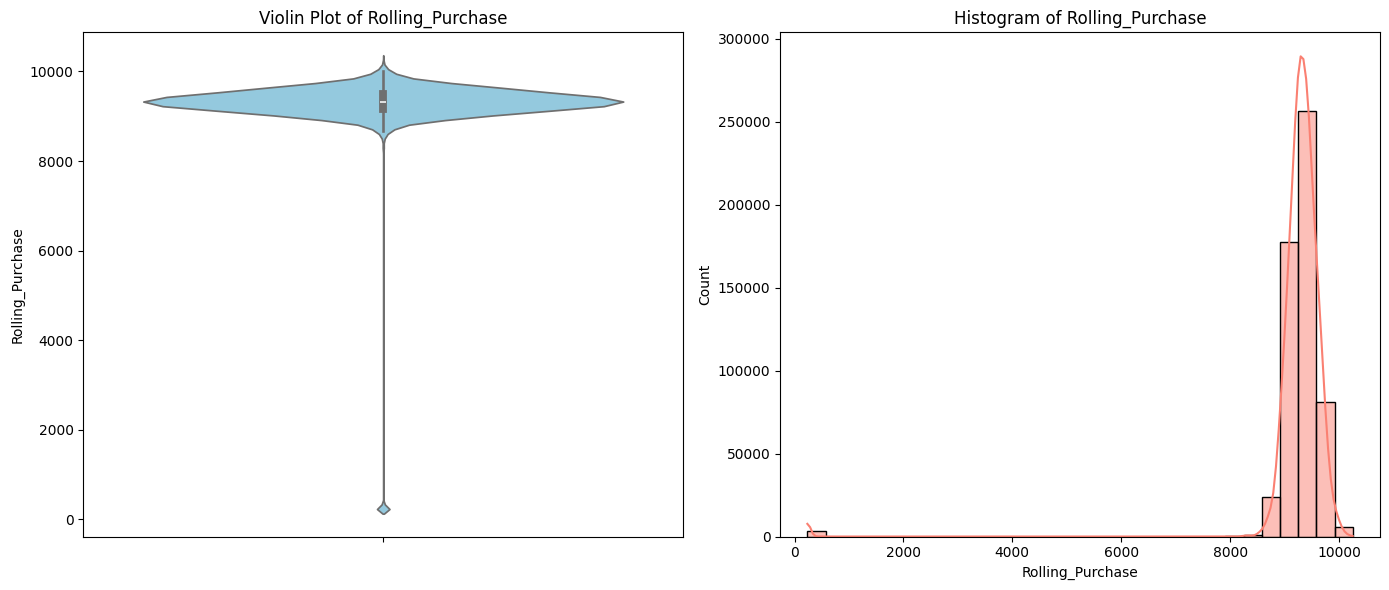

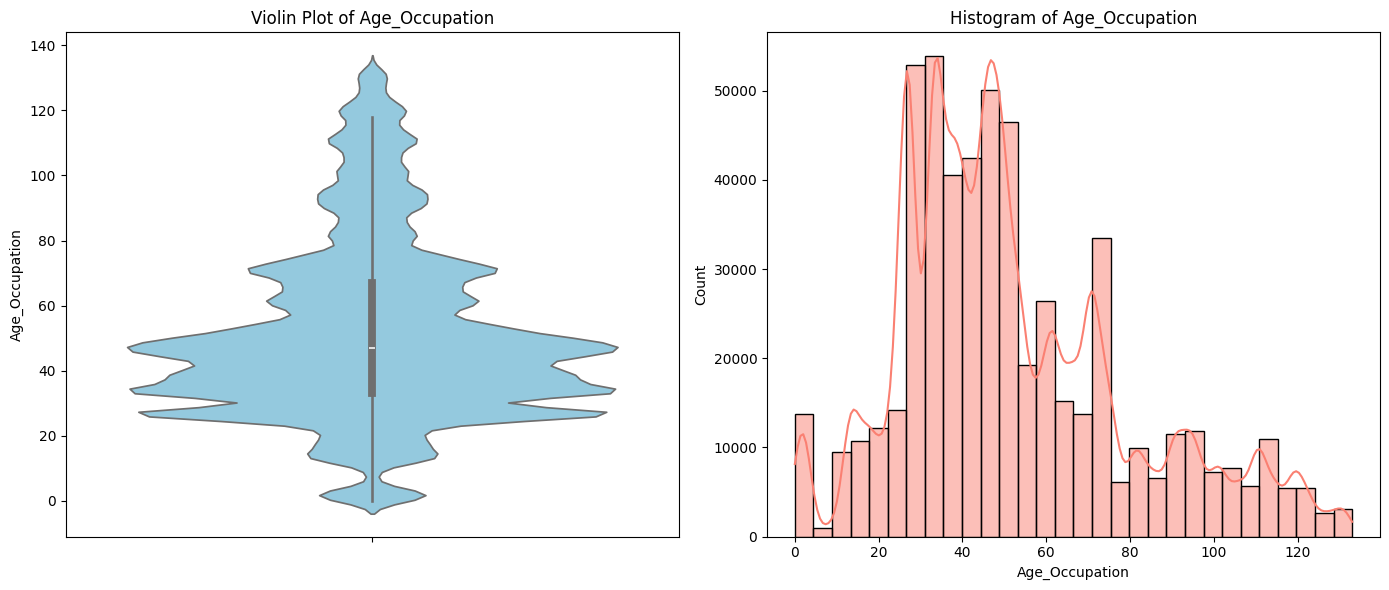

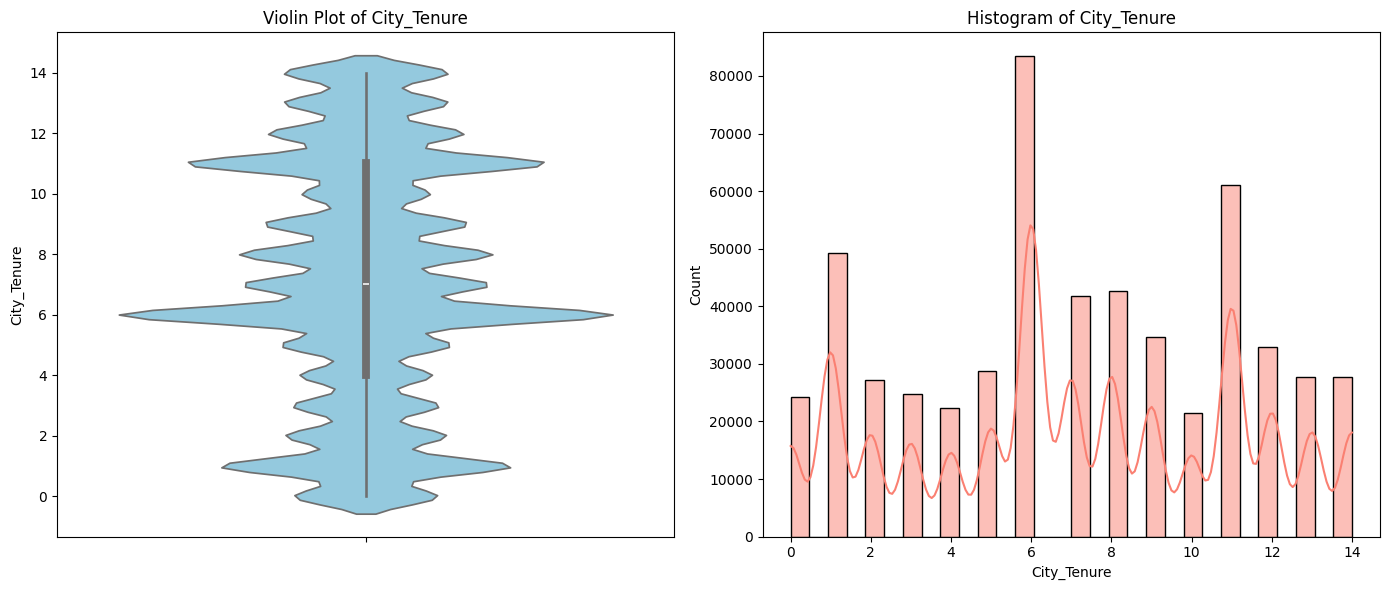

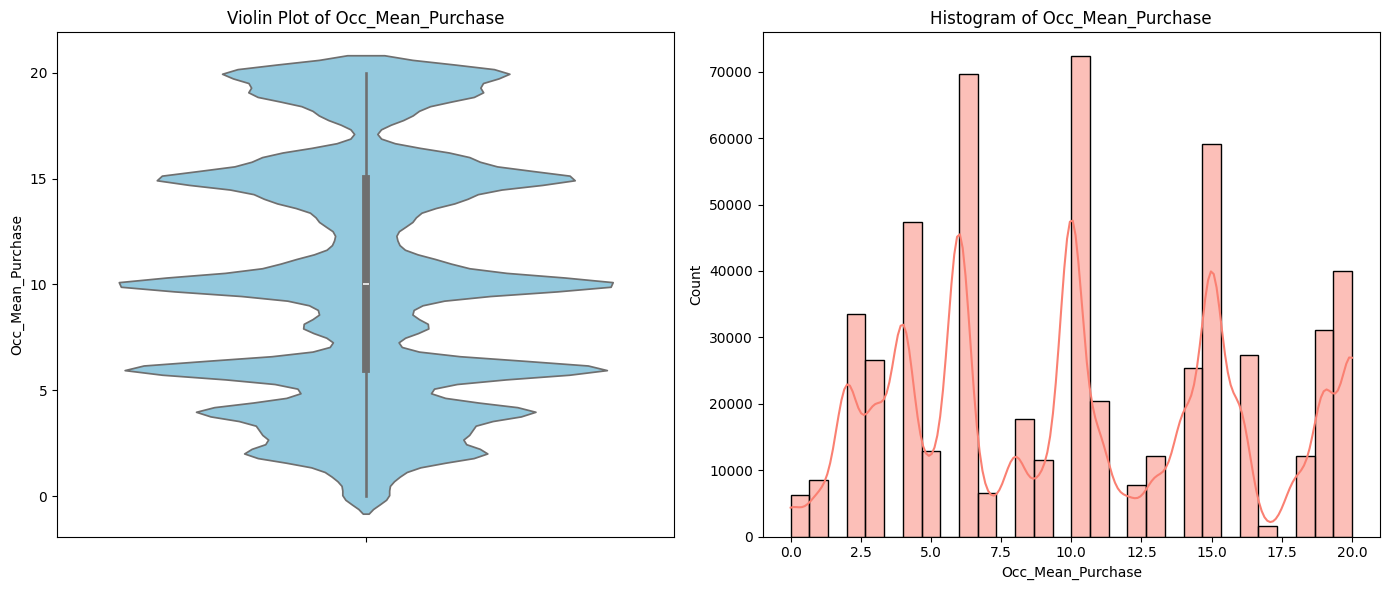

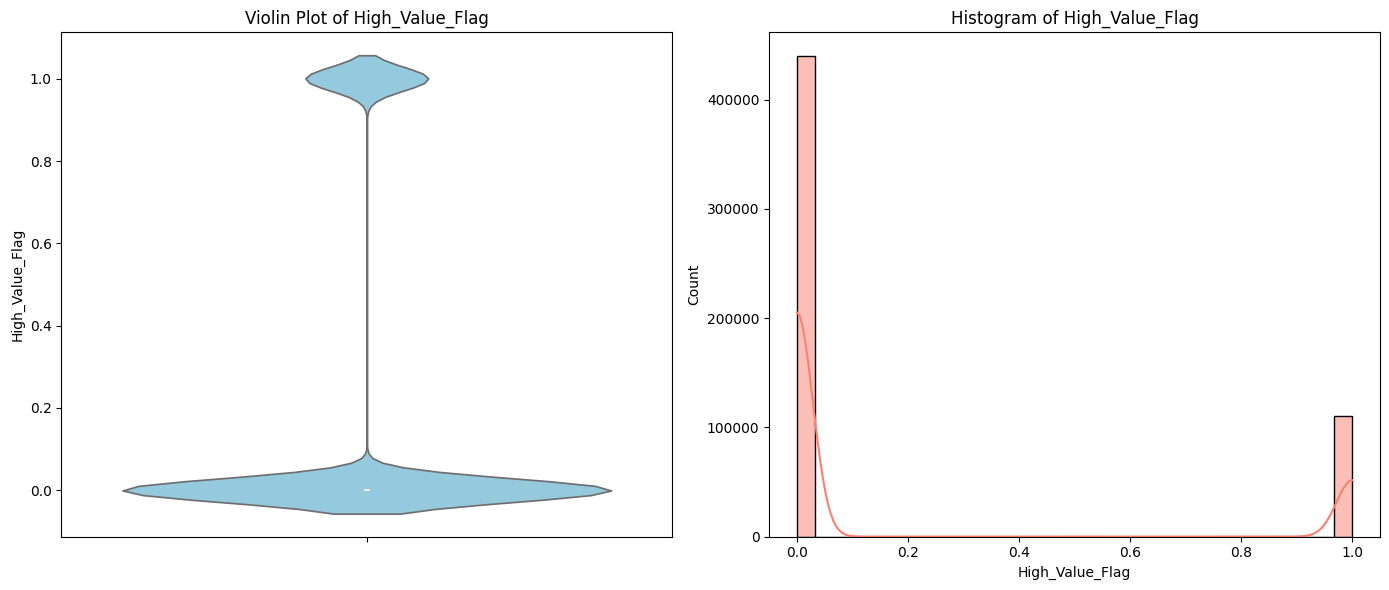

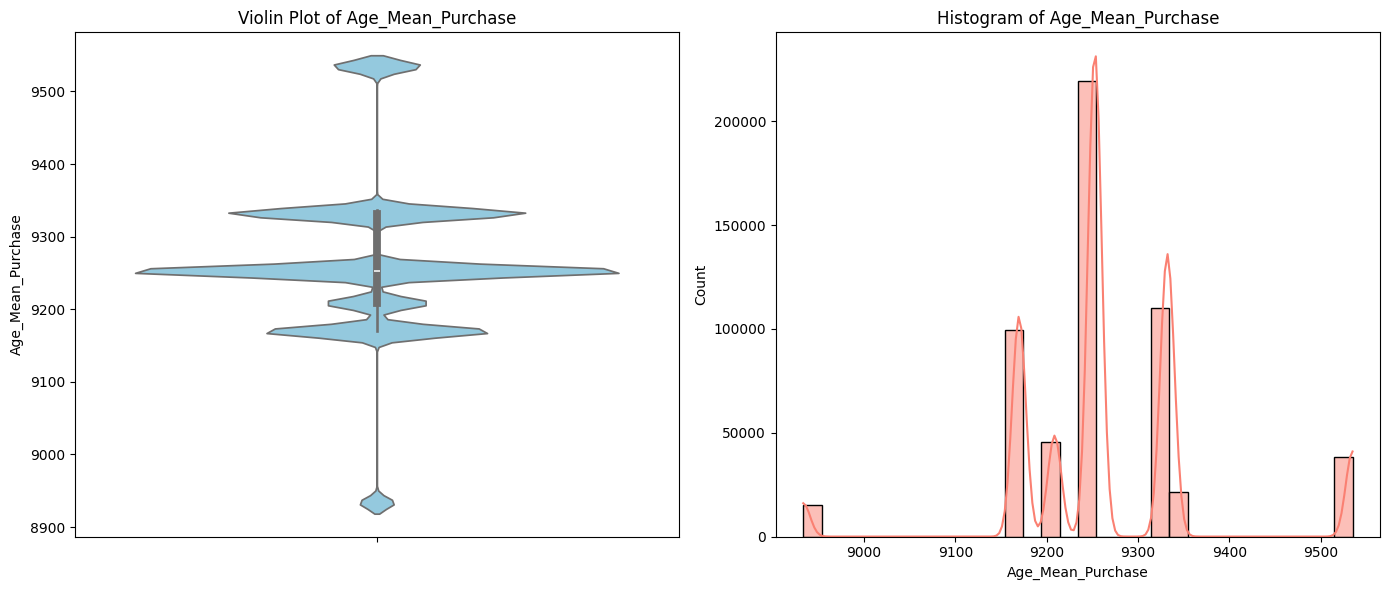

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of new features
new_features = [
    'Rolling_Purchase',
    'Age_Occupation',
    'City_Tenure',
    'Occ_Mean_Purchase',
    'High_Value_Flag',
    'Age_Mean_Purchase'
]

# Loop through features
for col in new_features:
    plt.figure(figsize=(14,6))

    # Violin plot
    plt.subplot(1,2,1)
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"Violin Plot of {col}")

    # Histogram
    plt.subplot(1,2,2)
    sns.histplot(df[col], kde=True, color="salmon", bins=30)
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

**Overall Takeaways**

- Behavioral features (Rolling_Purchase, Occ_Mean_Purchase) show stronger variation and predictive power than demographic ones (Age_Mean_Purchase, High_Value_Flag).
- Interaction features (Age_Occupation, City_Tenure) are especially valuable because they capture hidden socio-economic patterns.
- Outliers exist in continuous features (Rolling_Purchase, Occ_Mean_Purchase) and should be imputed or capped to stabilize models.
- Binary features (High_Value_Flag) highlight rare but important customer segments.


In [ ]:
def group_impute_outliers(df, col, group_col):
    df[f"{col}_Before"] = df[col].copy()
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    for g in df[group_col].unique():
        group_mean = df.loc[df[group_col]==g, col].mean()
        mask = (df[group_col]==g) & ((df[col] < lower_bound) | (df[col] > upper_bound))
        df.loc[mask, col] = group_mean

    df[f"{col}_After"] = df[col]
    return df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box_before_after(df, col):
    """
    Plots side-by-side boxplots for a feature before and after imputation.
    Assumes columns are named col+'_Before' and col+'_After'.
    """
    plt.figure(figsize=(12,6))

    # Before
    plt.subplot(1,2,1)
    sns.boxplot(y=df[f"{col}_Before"], color="lightgreen")
    plt.title(f"{col} - Before Imputation")

    # After
    plt.subplot(1,2,2)
    sns.boxplot(y=df[f"{col}_After"], color="lightblue")
    plt.title(f"{col} - After Imputation")

    plt.tight_layout()
    plt.show()

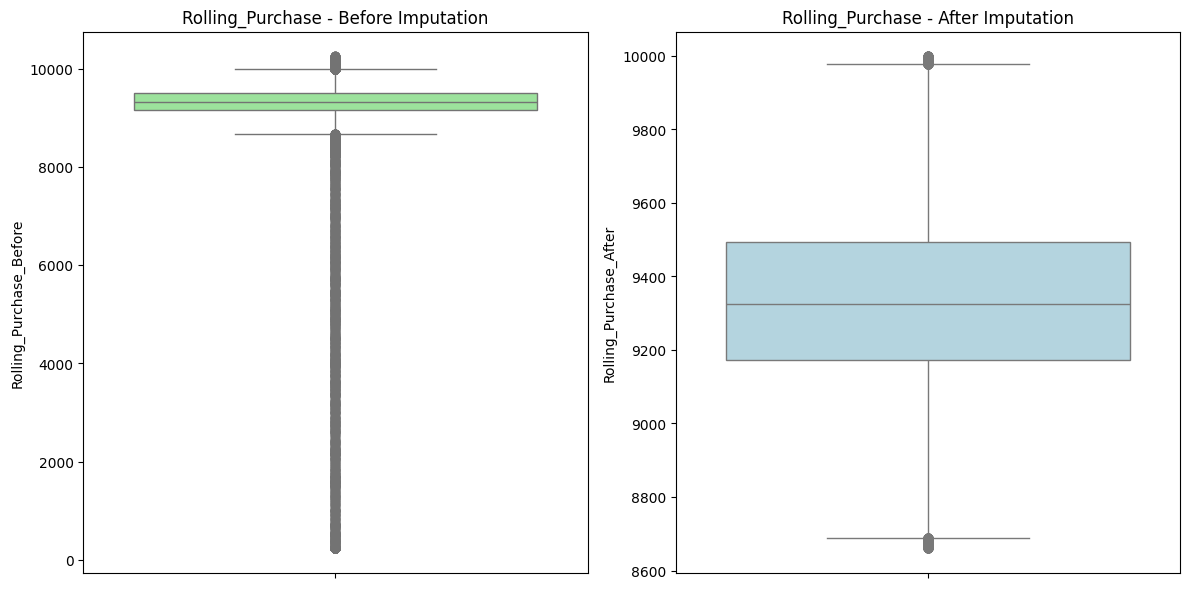

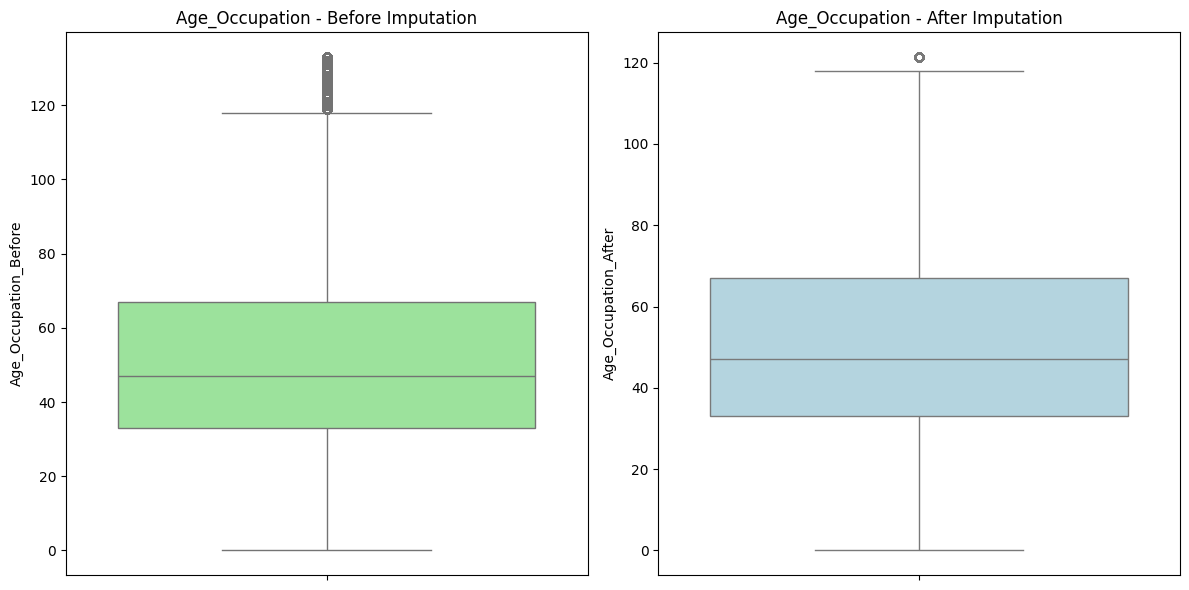

In [ ]:
features = [
    ('Rolling_Purchase', 'Occupation'),
    ('Age_Occupation', 'Age')
]

for feat, group in features:
    df = group_impute_outliers(df, feat, group)   # pass both col + group_col
    plot_box_before_after(df, feat)

In case of rolling purchase the amount of outlier is so high, which is quite natural and it is reduced after imputation.

In case of age occupation, the amount of outlier is also reduced.
So, imputation is done successfully.

**13.User recommendation**

In [ ]:
# Create the Interaction Matrix
# We use 'mean' in case a user bought the same product multiple times
interaction_matrix = df.pivot_table(index='User_ID', columns='Product_ID', values='Purchase', aggfunc='mean')

# Fill NaNs with 0 (meaning the user hasn't bought that item yet)
interaction_matrix = interaction_matrix.fillna(0)

print(f"Matrix Shape: {interaction_matrix.shape}")
interaction_matrix.head(6)

Matrix Shape: (5891, 3631)


Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,13650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000006,10620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity between users based on their purchase history
# Warning: This can be memory-intensive! Start with a subset if needed.
user_sim = cosine_similarity(interaction_matrix.iloc[:1000, :])
user_sim_df = pd.DataFrame(user_sim, index=interaction_matrix.index[:1000], columns=interaction_matrix.index[:1000])

# Look at who is most similar to the first user
print("Top 5 users similar to User 1:")
print(user_sim_df.iloc[0].sort_values(ascending=False).head(6))

Top 5 users similar to User 1:
User_ID
1000001    1.000000
1000969    0.314423
1000956    0.310879
1000607    0.310254
1000043    0.298278
1000239    0.297367
Name: 1000001, dtype: float64


In [ ]:
import numpy as np

def get_recommendations(user_id, interaction_matrix, user_sim_df, top_n=5):
    # 1. Get the similarity scores for the target user
    sim_scores = user_sim_df[user_id]

    # 2. Get products the target user has ALREADY bought (so we don't recommend them again)
    user_bought = interaction_matrix.loc[user_id]
    already_purchased = user_bought[user_bought > 0].index.tolist()

    # 3. Find the 'Top 5' similar users (excluding the user themselves)
    similar_users = sim_scores.sort_values(ascending=False).index[1:6]

    # 4. Get the purchase history of these similar users
    similar_user_purchases = interaction_matrix.loc[similar_users]

    # 5. Calculate a 'score' for products (Average purchase amount from similar users)
    # We drop columns the user has already bought
    recommendations = similar_user_purchases.mean().drop(already_purchased)

    # 6. Sort by the highest score and return the Top N
    return recommendations.sort_values(ascending=False).head(top_n)

# Example: Get recommendations for User 1000001
# (Make sure this ID exists in your index subset)
example_id = interaction_matrix.index[0]
print(f"Top Recommendations for User {example_id}:")
print(get_recommendations(example_id, interaction_matrix, user_sim_df))

Top Recommendations for User 1000001:
Product_ID
P00265242    8081.4
P00052842    4686.4
P00085342    4668.2
P00220442    4522.2
P00058242    4331.0
dtype: float64


 Insights from the Example
- Top recommendation: P00265242 with a score of ~8081.4 → This product is highly aligned with the user’s past behavior.
- The other products (P00052842, P00085342, etc.) have lower but still strong scores, meaning they are good candidates for recommendation.
- The scores themselves are not raw purchase values — they represent predicted affinity (how much the model thinks the user would like or buy that product).

